In [100]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime

In [101]:
# This turns all the axes white in all the matplotlib plots. Comment this out if you dont want that
COLOR = 'white'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

In [102]:
df_transaction = pd.read_csv('./datasets/ieee-fraud-detection/train_transaction.csv')

df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
# Neural Network
features = ['isFraud', 'TransactionDT',
            'TransactionAmt','ProductCD', 'P_emaildomain','R_emaildomain', 'card4']

df = df_transaction[features]
df.head()

target = 'isFraud'
cat = ['TransactionDT','ProductCD', 'P_emaildomain','R_emaildomain', 'card4']
num = ['TransactionAmt']

df = df.dropna()
y = df[target].values

x_cat = df.filter(items = cat).values 
x_num = df.filter(items = num).values

labelencoder_X = LabelEncoder()
for i in range(len(cat)): 
    x_cat[:, i] = labelencoder_X.fit_transform(x_cat[:, i])
    
X = np.concatenate((x_cat, x_num), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

X_train = np.asarray(X_train).astype('float32') 
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

X_train.shape, y_train.shape

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=10)

val_loss, val_acc = model.evaluate(X_val, y_val)
print(val_loss, val_acc)

# For same number of layers, adding the extra feature of card4 does not really enhance the predictive prowess of our model.

Epoch 1/10
2521/2521 [==============================] - 2s 596us/step - loss: 69.5393 - accuracy: 0.8391
Epoch 2/10
2521/2521 [==============================] - 1s 594us/step - loss: 19.6372 - accuracy: 0.8424
Epoch 3/10
2521/2521 [==============================] - 1s 589us/step - loss: 7.3218 - accuracy: 0.8447
Epoch 4/10
2521/2521 [==============================] - 1s 589us/step - loss: 2.0522 - accuracy: 0.8550
Epoch 5/10
2521/2521 [==============================] - 1s 589us/step - loss: 0.6968 - accuracy: 0.8805
Epoch 6/10
2521/2521 [==============================] - 2s 596us/step - loss: 0.3898 - accuracy: 0.9056
Epoch 7/10
2521/2521 [==============================] - 1s 589us/step - loss: 0.3098 - accuracy: 0.9159
Epoch 8/10
2521/2521 [==============================] - 1s 587us/step - loss: 0.2907 - accuracy: 0.9159
Epoch 9/10
2521/2521 [==============================] - 2s 596us/step - loss: 0.2896 - accuracy: 0.9163
Epoch 10/10
631/631 [==============================] - 0s 357u

631/631 [==============================] - 0s 303us/step
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18559
         1.0       0.00      0.00      0.00      1605

    accuracy                           0.92     20164
   macro avg       0.46      0.50      0.48     20164
weighted avg       0.85      0.92      0.88     20164



/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

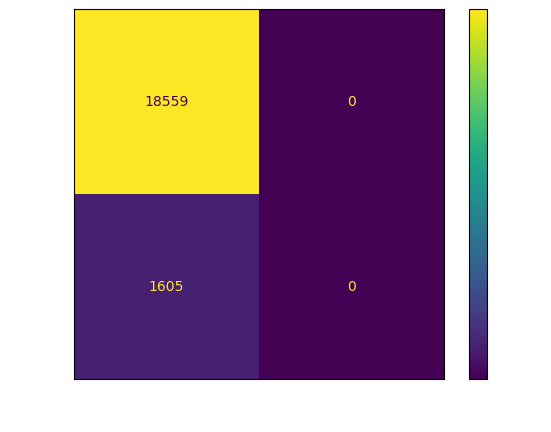

In [104]:
from sklearn.metrics import classification_report
from sklearn import metrics

# Predict on validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred)


print(classification_report(y_val, y_pred))
conf_mat = confusion_matrix(y_val, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
cm_display.plot()
plt.show()

#Feature Importance
We are going to determine which feature is the most important for predicting the target feature "isFraud"

Methology:
Use the get_weights method of the Dense layer object. This method returns a list of two numpy arrays, the first of which contains the weight values and the second contains the bias values for the layer.

Example code:
Methology below compares each feature against "isFraud" target feature.

In [19]:
# This is for the first hidden layer. 

#Get the weights for the first hidden layer
weights = model.layers[0].get_weights()[0]

# Calculate the feature importance scores as the absolute sum of the weights for each feature
importance_scores = np.abs(weights).sum(axis=0)

# Normalize the scores to sum to 1
importance_scores = importance_scores / importance_scores.sum()

# Print the importance scores for each feature
print('Feature Importance Scores:')
for i, feature in enumerate(features[1:]):
    print(f'{feature}: {importance_scores[i]:.3f}')

Feature Importance Scores:
TransactionDT: 0.009
TransactionAmt: 0.012
ProductCD: 0.006
P_emaildomain: 0.006
R_emaildomain: 0.003
card4: 0.007


In [20]:
#The methology below implements feature importance for each layer

# Define a function to calculate and normalize feature importance scores for a given layer
def get_feature_importance(layer):
    # Get the weights for the layer
    weights = layer.get_weights()[0]

    # Calculate the feature importance scores as the absolute sum of the weights for each feature
    importance_scores = np.abs(weights).sum(axis=0)

    # Normalize the scores to sum to 1
    importance_scores = importance_scores / importance_scores.sum()

    return importance_scores

# Calculate the feature importance scores for each layer
layer_importance = {}
for i, layer in enumerate(model.layers):
    if isinstance(layer, tf.keras.layers.Dense):
        layer_importance[f'layer_{i}'] = get_feature_importance(layer)

# Print the importance scores for each layer and feature
for layer_name, importance_scores in layer_importance.items():
    print(f'{layer_name} Feature Importance Scores:')
    for i, feature in enumerate(features[1:]):
        print(f'{feature}: {importance_scores[i]:.3f}')

layer_0 Feature Importance Scores:
TransactionDT: 0.009
TransactionAmt: 0.012
ProductCD: 0.006
P_emaildomain: 0.006
R_emaildomain: 0.003
card4: 0.007
layer_1 Feature Importance Scores:
TransactionDT: 0.008
TransactionAmt: 0.008
ProductCD: 0.008
P_emaildomain: 0.007
R_emaildomain: 0.008
card4: 0.008
layer_2 Feature Importance Scores:
TransactionDT: 1.000


IndexError: index 1 is out of bounds for axis 0 with size 1

#Undersampling
Implementing NearMiss Undersampling technique

This method selects the majority class examples that are closest to the minority class examples, based on a distance metric. This can help focus on the most informative majority class examples and reduce the imbalance.

In [21]:
# Import required libraries
from imblearn.under_sampling import NearMiss

# Instantiate the NearMiss object
nm = NearMiss(version=2, sampling_strategy='majority', n_neighbors=3)

In [22]:
# Apply undersampling to the original data
X_train_resampled, y_train_resampled = nm.fit_resample(X_train, y_train)


In [23]:
# Convert data to numpy arrays and preprocess
X_train_resampled = np.asarray(X_train_resampled).astype('float32')
y_train_resampled = np.asarray(y_train_resampled).astype('float32').reshape((-1, 1))
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32').reshape((-1, 1))
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32').reshape((-1, 1))

# Print the shape of the resampled data
print('Original data shape:', X_train.shape, y_train.shape)
print('Resampled data shape:', X_train_resampled.shape, y_train_resampled.shape)

#Save the undersampled data for NearMiss
X_train_nm = X_train_resampled
y_train_nm = y_train_resampled

Original data shape: (80656, 6) (80656, 1)
Resampled data shape: (13500, 6) (13500, 1)


#Implement Tomek Links Undersampling

This method involves removing samples that are classified as borderline cases, where there is a very small distance between samples of the minority class and majority class. This can help in removing noisy or ambiguous data and improve classification performance.

In [28]:
# Import required libraries
from imblearn.under_sampling import TomekLinks

# Instantiate the TomekLinks object
tl = TomekLinks()

# Apply undersampling to the original data
X_train_resampled, y_train_resampled = tl.fit_resample(X_train, y_train)

# Convert data to numpy arrays and preprocess
X_train_resampled = np.asarray(X_train_resampled).astype('float32')
y_train_resampled = np.asarray(y_train_resampled).astype('float32').reshape((-1, 1))
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32').reshape((-1, 1))
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32').reshape((-1, 1))

# Print the shape of the resampled data
print('Original data shape:', X_train.shape, y_train.shape)
print('Resampled data shape:', X_train_resampled.shape, y_train_resampled.shape)

#Save the undersampled data for Tomek Links
X_train_tl = X_train_resampled
y_train_tl = y_train_resampled


Original data shape: (80656, 6) (80656, 1)
Resampled data shape: (79423, 6) (79423, 1)


In [26]:
#Passing NearMiss sorted data to the model

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.fit(X_train_nm, y_train_nm, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Resampled data:', test_loss, test_acc)


Epoch 1/10
422/422 [==============================] - 1s 1ms/step - loss: 132.2999 - accuracy: 0.5010 - val_loss: 2.9988 - val_accuracy: 0.9060
Epoch 2/10
422/422 [==============================] - 1s 1ms/step - loss: 18.4665 - accuracy: 0.4984 - val_loss: 1.3630 - val_accuracy: 0.2444
Epoch 3/10
422/422 [==============================] - 1s 1ms/step - loss: 3.7973 - accuracy: 0.4999 - val_loss: 0.8816 - val_accuracy: 0.8950
Epoch 4/10
422/422 [==============================] - 1s 1ms/step - loss: 0.9979 - accuracy: 0.4979 - val_loss: 2.0409 - val_accuracy: 0.2509
Epoch 5/10
422/422 [==============================] - 1s 1ms/step - loss: 0.7526 - accuracy: 0.5133 - val_loss: 1.2837 - val_accuracy: 0.6026
Epoch 6/10
422/422 [==============================] - 1s 1ms/step - loss: 1.1897 - accuracy: 0.5458 - val_loss: 1.3222 - val_accuracy: 0.8940
Epoch 7/10
422/422 [==============================] - 1s 1ms/step - loss: 1.0753 - accuracy: 0.5079 - val_loss: 1.9167 - val_accuracy: 0.3558
Epo

In [29]:
#Passing Tomek Links sorted data to the model

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.fit(X_train_tl, y_train_tl, epochs=10)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Resampled data:', test_loss, test_acc)


Epoch 1/10
2482/2482 [==============================] - 2s 706us/step - loss: 22.5059 - accuracy: 0.8637
Epoch 2/10
2482/2482 [==============================] - 2s 713us/step - loss: 0.6100 - accuracy: 0.9079
Epoch 3/10
2482/2482 [==============================] - 2s 710us/step - loss: 0.2947 - accuracy: 0.9150
Epoch 4/10
2482/2482 [==============================] - 2s 696us/step - loss: 0.3083 - accuracy: 0.9144
Epoch 5/10
2482/2482 [==============================] - 2s 687us/step - loss: 0.2962 - accuracy: 0.9150
Epoch 6/10
2482/2482 [==============================] - 2s 685us/step - loss: 0.3164 - accuracy: 0.9145
Epoch 7/10
2482/2482 [==============================] - 2s 692us/step - loss: 0.2910 - accuracy: 0.9150
Epoch 8/10
2482/2482 [==============================] - 2s 686us/step - loss: 0.3032 - accuracy: 0.9146
Epoch 9/10
2482/2482 [==============================] - 2s 679us/step - loss: 0.3110 - accuracy: 0.9142
Epoch 10/10
788/788 [==============================] - 0s 393us

Perform oversampling
Random oversampling randomly selects examples from the minority class and replicates them until the class distribution is balanced. 

In [30]:
#performing random oversampling

from imblearn.over_sampling import RandomOverSampler

# Create the oversampler object
ros = RandomOverSampler(random_state=0)

# Resample the training set
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Convert data to numpy arrays and preprocess
X_train_resampled = np.asarray(X_train_resampled).astype('float32')
y_train_resampled = np.asarray(y_train_resampled).astype('float32').reshape((-1, 1))
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32').reshape((-1, 1))
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32').reshape((-1, 1))

# Print the shape of the resampled data
print('Original data shape:', X_train.shape, y_train.shape)
print('Resampled data shape:', X_train_resampled.shape, y_train_resampled.shape)

#Save the undersampled data for Tomek Links
X_train_ros = X_train_resampled
y_train_ros = y_train_resampled


Original data shape: (80656, 6) (80656, 1)
Resampled data shape: (147812, 6) (147812, 1)


SMOTE is the oversampling method that creates synthetic examples of the minority class by interpolating between neighboring examples. It can reduce the risk of overfitting but can also lead to false negatives.

In [31]:
#Performing SMOTE oversampling

from imblearn.over_sampling import SMOTE

# Create the oversampler object
smote = SMOTE(random_state=0)

# Resample the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert data to numpy arrays and preprocess
X_train_resampled = np.asarray(X_train_resampled).astype('float32')
y_train_resampled = np.asarray(y_train_resampled).astype('float32').reshape((-1, 1))
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32').reshape((-1, 1))
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32').reshape((-1, 1))

# Print the shape of the resampled data
print('Original data shape:', X_train.shape, y_train.shape)
print('Resampled data shape:', X_train_resampled.shape, y_train_resampled.shape)

#Save the undersampled data for Tomek Links
X_train_smote = X_train_resampled
y_train_smote = y_train_resampled

Original data shape: (80656, 6) (80656, 1)
Resampled data shape: (147812, 6) (147812, 1)


In [32]:
#Passing Random oversampling sorted data to the model

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.fit(X_train_ros, y_train_ros, epochs=20, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Resampled data:', test_loss, test_acc)

Epoch 1/20
4620/4620 [==============================] - 4s 753us/step - loss: 28.1235 - accuracy: 0.5281 - val_loss: 0.4309 - val_accuracy: 0.9192
Epoch 2/20
4620/4620 [==============================] - 3s 737us/step - loss: 0.7421 - accuracy: 0.5250 - val_loss: 0.6996 - val_accuracy: 0.0873
Epoch 3/20
4620/4620 [==============================] - 3s 736us/step - loss: 0.7378 - accuracy: 0.5004 - val_loss: 0.7296 - val_accuracy: 0.0799
Epoch 4/20
4620/4620 [==============================] - 3s 755us/step - loss: 0.7096 - accuracy: 0.5003 - val_loss: 0.6661 - val_accuracy: 0.9204
Epoch 5/20
4620/4620 [==============================] - 4s 769us/step - loss: 0.7129 - accuracy: 0.5002 - val_loss: 0.6753 - val_accuracy: 0.9204
Epoch 6/20
4620/4620 [==============================] - 3s 733us/step - loss: 0.7216 - accuracy: 0.5009 - val_loss: 0.6824 - val_accuracy: 0.9204
Epoch 7/20
4620/4620 [==============================] - 3s 737us/step - loss: 0.7109 - accuracy: 0.4998 - val_loss: 0.6959 

In [33]:
#Passing SMOTE sorted data to the model

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.fit(X_train_smote, y_train_smote, epochs=20, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Resampled data:', test_loss, test_acc)

Epoch 1/20
4620/4620 [==============================] - 4s 756us/step - loss: 15.7314 - accuracy: 0.5210 - val_loss: 0.6857 - val_accuracy: 0.9178
Epoch 2/20
4620/4620 [==============================] - 3s 755us/step - loss: 0.7328 - accuracy: 0.5004 - val_loss: 0.6953 - val_accuracy: 0.0866
Epoch 3/20
4620/4620 [==============================] - 4s 769us/step - loss: 0.7046 - accuracy: 0.4985 - val_loss: 0.7083 - val_accuracy: 0.0816
Epoch 4/20
4620/4620 [==============================] - 3s 742us/step - loss: 0.6978 - accuracy: 0.5007 - val_loss: 0.6887 - val_accuracy: 0.9203
Epoch 5/20
4620/4620 [==============================] - 3s 743us/step - loss: 0.6951 - accuracy: 0.5004 - val_loss: 0.6968 - val_accuracy: 0.0800
Epoch 6/20
4620/4620 [==============================] - 3s 733us/step - loss: 0.8435 - accuracy: 0.4990 - val_loss: 0.6838 - val_accuracy: 0.9204
Epoch 7/20
4620/4620 [==============================] - 3s 732us/step - loss: 0.6992 - accuracy: 0.5004 - val_loss: 0.6890 

In [34]:
#Manually oversample
df = df.sample(frac=1)
is_Fraud1 = df.loc[df['isFraud'] == 1]
is_Fraud0 = df.loc[df['isFraud'] == 0]

normal_distributed_df = pd.concat([is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1,
                                    is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1, is_Fraud1,
                                   is_Fraud0])

# Shuffle dataframe rows
df = normal_distributed_df.sample(frac=1, random_state=42)
df.head()

df.shape()

,isFraud,TransactionDT,TransactionAmt,ProductCD,P_emaildomain,R_emaildomain,card4
286103,1,7015998,200.000,R,gmail.com,gmail.com,visa
491533,1,12836640,3.935,C,outlook.com,outlook.com,mastercard
81090,0,1736661,129.426,C,hotmail.com,hotmail.com,mastercard
431309,1,10889440,36.273,C,gmail.com,gmail.com,visa
61442,0,1386818,100.000,R,gmail.com,anonymous.com,visa


In [ ]:
feature_list = ['isFraud', 'card4', 'card6', 'TransactionAmt','ProductCD', 'P_emaildomain','R_emaildomain', 'addr2']
target = 'isFraud'
# Categorical features
cat = ['ProductCD', 'P_emaildomain','R_emaildomain', 'card4', 'card6', 'addr2']
# Numeric features
num = ['TransactionAmt']

df["P_emaildomain"].fillna("None", inplace = True)
df["R_emaildomain"].fillna("None", inplace = True)

temp = df[feature_list]
temp

temp = temp.dropna()
temp

features = temp[cat]
features = pd.get_dummies(features)
features

features['TransactionAmt'] = temp['TransactionAmt']
features

features['isFraud'] = temp['isFraud']
features

# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['isFraud'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('isFraud', axis = 1)

# Saving feature names for later use
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

